In [1]:
import pandas as pd

tweets = pd.read_csv('tweets.csv', encoding = "utf-8")

tweets.head()

,tweet
0,احد خيارات التنزهة بمدينة الرياض حديقة الحيوان...
1,حديقة جميلة للاطفال وسعر دخول ممتاز واكشاك بس...
2,ممتاز جدا عندي بس بعض الملاحظات والاقتراحات\n١...
3,حديقة منظمة وبها عديد كبير من الحيوانات\nالخدم...
4,فيه تجديدات حلوة ومكان جميل وسعر مناسب، نتمنى ...


In [2]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   23547 non-null  object
dtypes: object(1)
memory usage: 184.1+ KB


In [3]:
positive = pd.read_csv('positive.csv' ,encoding = "utf-8")

positive.head()

,score,word
0,3,ممتاز
1,3,رائع
2,3,مبهر
3,3,جميل
4,3,ساحر


In [4]:
negative = pd.read_csv('negative.csv' ,encoding = "utf-8")

negative.tail()

,score,word
1114,-2,صعب
1115,-3,الخيبه
1116,-1,فاحش
1117,-2,زائد
1118,-3,مخيسة


In [5]:
# !pip install snowballstemmer

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from snowballstemmer import stemmer
import string

import re 

# Downloads
nltk.download('punkt')
nltk.download('stopwords')

# for V2
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

# for V2    
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                                     ّ    | # Tashdid
                                     َ    | # Fatha
                                     ً    | # Tanwin Fath
                                     ُ    | # Damma
                                     ٌ    | # Tanwin Damm
                                     ِ    | # Kasra
                                     ٍ    | # Tanwin Kasr
                                     ْ    | # Sukun
                                     ـ     # Tatwil/Kashida
                                 """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)


def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")  # You missed assigning back to `text`
    return text

def cleaning_text(text):
    numbers = "0123456789"
    arabic_punctuation = '''`÷×؛<>_()*^ـ،/:"؟.,'~¦+|!”…“–ـ'''
    english_punctuation = string.punctuation

    del_chars = english_punctuation + arabic_punctuation + numbers
    text = remove_chars(text, del_chars)
    text = text.replace('\n', ' ')
    text = text.strip()  # Fixed typo: `straip()` -> `strip()`

    return text

def filtering_text(tokens_list):
    listStopwords = stopwords.words("arabic")
    filtered = [token for token in tokens_list if token not in listStopwords]
    return filtered

def stemming_text(tokens_list):
    ar_stem = stemmer('arabic')
    stem_text = [ar_stem.stemWord(token) for token in tokens_list]  # Use `stemWord` instead of `stem`
    return stem_text

def to_sentence(words_list):
    sentence = ' '.join(words_list)  # Fixed: use ' '.join(list), not list.join(' ')
    return sentence


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
ar_stemmer = stemmer("arabic")

stem = ar_stemmer.stemWord("رايع")
print (stem)

stem = ar_stemmer.stemWord("رائع")
print (stem)

stem = ar_stemmer.stemWord("رائعون")
print (stem)

stem = ar_stemmer.stemWord("رائعين")
print (stem)

رايع
رايع
رايع
رايع


In [8]:
text= "!أنا أحب الذهاب إلى الحديقة، كل يوم 9 صباحاً مع رفاقي هؤلاء "
print(text)

text=cleaning_text(text)
print(text)

tokens_list=word_tokenize(text)
print(tokens_list)

tokens_list=filtering_text(tokens_list)
print(tokens_list)

tokens_list=stemming_text(tokens_list)
print(tokens_list)

!أنا أحب الذهاب إلى الحديقة، كل يوم 9 صباحاً مع رفاقي هؤلاء 
أنا أحب الذهاب إلى الحديقة كل يوم  صباحاً مع رفاقي هؤلاء
['أنا', 'أحب', 'الذهاب', 'إلى', 'الحديقة', 'كل', 'يوم', 'صباحاً', 'مع', 'رفاقي', 'هؤلاء']
['أحب', 'الذهاب', 'الحديقة', 'يوم', 'صباحاً', 'رفاقي']
['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [9]:
def text_processing(text): 
    text = cleaning_text(text)
    tokens_list = word_tokenize(text)
    tokens_list = filtering_text(tokens_list)
    tokens_list = stemming_text(tokens_list)
    return tokens_list

def text_processing_v2(text):
    text = text.strip()
    text = remove_diacritics(text)
    text = normalize_arabic(text)
    text = cleaning_text(text)
    tokens = word_tokenize(text)
    tokens = filtering_text(tokens)
    tokens = stemming_text(tokens)
    return tokens


In [10]:
# Example Usage
arabic_text_example = "أهلاً وسهلاً بالعالم! هذه تجربة نصية مع بعض التشكيل والتنقيط، ؤمئ."
arabic_text_with_diacritics = "قُلْ أَعُوذُ بِرَبِّ ٱلْفَلَقِ"

print(f"Original Text V1: {arabic_text_example}")
processed_tokens_v1 = text_processing(arabic_text_example)
print(f"Processed Tokens V1: {processed_tokens_v1}")
print(f"Processed Sentence V1: {to_sentence(processed_tokens_v1)}")

print("\n" + "="*30 + "\n")

print(f"Original Text V2: {arabic_text_with_diacritics}")
processed_tokens_v2 = text_processing_v2(arabic_text_with_diacritics)
print(f"Processed Tokens V2: {processed_tokens_v2}")
print(f"Processed Sentence V2: {to_sentence(processed_tokens_v2)}")

print("\n" + "="*30 + "\n")

Original Text V1: أهلاً وسهلاً بالعالم! هذه تجربة نصية مع بعض التشكيل والتنقيط، ؤمئ.
Processed Tokens V1: ['اهل', 'سهل', 'عالم', 'تجرب', 'نص', 'تشكيل', 'والتنقيط', 'ومء']
Processed Sentence V1: اهل سهل عالم تجرب نص تشكيل والتنقيط ومء


Original Text V2: قُلْ أَعُوذُ بِرَبِّ ٱلْفَلَقِ
Processed Tokens V2: ['قل', 'اعوذ', 'برب', 'ٱلفلق']
Processed Sentence V2: قل اعوذ برب ٱلفلق




In [11]:
tweets['tweet_preprocessed'] = tweets['tweet'].apply(text_processing)
tweets['tweet_preprocessed_v2'] = tweets['tweet'].apply(text_processing_v2)

tweets.drop_duplicates(subset = 'tweet_preprocessed', inplace = True)
tweets.drop_duplicates(subset = 'tweet_preprocessed_v2', inplace = True)

In [12]:
tweets.head(5)

,tweet,tweet_preprocessed,tweet_preprocessed_v2
0,احد خيارات التنزهة بمدينة الرياض حديقة الحيوان...,"[احد, خيارا, تنزه, مدين, رياض, حديق, حيوان, جي...","[احد, خيارا, تنزهه, مدين, رياض, حديق, حيوان, ج..."
1,حديقة جميلة للاطفال وسعر دخول ممتاز واكشاك بس...,"[حديق, جميل, اطفال, سعر, دخول, ممتاز, واكش, سي...","[حديق, جميل, اطفال, سعر, دخول, ممتاز, واكش, سي..."
2,ممتاز جدا عندي بس بعض الملاحظات والاقتراحات\n١...,"[ممتاز, جدا, عند, ملاحظ, والاقتراحا, 1ف, كثير,...","[ممتاز, جدا, عند, ملاحظ, والاقتراحا, 1ف, كثير,..."
3,حديقة منظمة وبها عديد كبير من الحيوانات\nالخدم...,"[حديق, منظم, وبه, عديد, كبير, حيوان, خدم, مكتم...","[حديق, منظم, وبه, عديد, كبير, حيوان, خدم, مكتم..."
4,فيه تجديدات حلوة ومكان جميل وسعر مناسب، نتمنى ...,"[تجديدا, حلو, مكان, جميل, سعر, مناسب, نتمني, ي...","[تجديدا, حلو, مكان, جميل, سعر, مناسب, نتم, يسم..."


In [13]:
positive['word_preprocessed'] = positive['word'].apply(text_processing)
positive['word_preprocessed'] = positive['word_preprocessed'].apply(to_sentence)
 
positive.drop_duplicates(subset = 'word_preprocessed', inplace = True)

positive.dropna(subset = 'word_preprocessed', inplace = True)

In [14]:
negative['word_preprocessed'] = negative['word'].apply(text_processing)
negative['word_preprocessed'] = negative['word_preprocessed'].apply(to_sentence)
 
negative.drop_duplicates(subset = 'word_preprocessed', inplace = True)

negative.dropna(subset = 'word_preprocessed', inplace = True)

In [15]:
dict_positive = {} 
dict_negative = {}
for _,row in positive.iterrows():
    word = row['word_preprocessed']
    dict_positive[word] = row['score']
for _,row in negative.iterrows():
    word = row['word_preprocessed']
    dict_negative[word] = row['score']


In [16]:
def get_polarity(words_list):
    score = 0
    for word in words_list:
        if (word in dict_positive):
            score = score + dict_positive[word]
    for word in words_list:
        if (word in dict_negative):
            score = score + dict_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [17]:
for idx, row in tweets.iterrows():
    
    tweets_words=tweets.loc[idx,'tweet_preprocessed']
    
    score, polarity = get_polarity(tweets_words)
    tweets.loc[idx,'polarity_score'] =score
    tweets.loc[idx,'polarity' ] =polarity

    # tweets_words=tweets.loc[idx,'tweet_preprocessed_v2']
    
    # score, polarity = get_polarity(tweets_words)
    # tweets.loc[idx,'polarity_score_v2'] =score
    # tweets.loc[idx,'polarity_v2'] =polarity

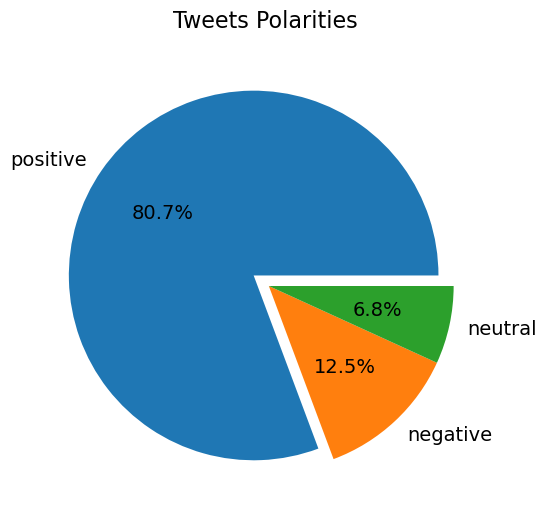

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 6))

x = tweets['polarity'].value_counts()

labels = x.index
explode = (0.1, 0, 0)

ax.pie(x = x, labels = labels, autopct = '%1.1f%%', 
       explode = explode, textprops={'fontsize': 14})

ax.set_title('Tweets Polarities ', fontsize = 16, pad = 20)

plt.show()

In [23]:
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets.sort_values(by = 'polarity_score', ascending=False)
positive_tweets[['tweet','polarity_score']].head()


,tweet,polarity_score
15124,"""متحف حائل"".. سياحة مشوقة عبر الزمن في ""شتاء ا...",116.0
14642,"قصر جميل لكن مهمل من الدولة\nحكاية قصر ""الخواج...",109.0
16223,والله رهيبة بشكل مو طبيعي وحلوة جداً في الشتاء...,103.0
14613,عرف الموقع التاريخي بـداية بـ قصر جبره والذي ي...,91.0
21153,متحف رائع ويستحق الزيارة لمعرفة تاريخ الأحساء ...,90.0


In [24]:
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets.sort_values(by = 'polarity_score', ascending=True)
negative_tweets[['tweet','polarity_score']].head()

,tweet,polarity_score
8667,سيئة للغاية أسعار مبالغ فيها طريقة استخدام الب...,-16.0
14038,سعره مبالغ فيه و المحلات تحت مقفله وشبه مهجورة...,-13.0
6649,للاسف البيك في المنطقه الشرقيه ادارتهم فاشله خ...,-13.0
1806,سعر تذكرة الدخول ١٠٠ ريال للشخص ولا تتضمن شي ب...,-13.0
10916,برد وزحمه وشباب غير مسؤول ولا واعي بان للاخرين...,-11.0


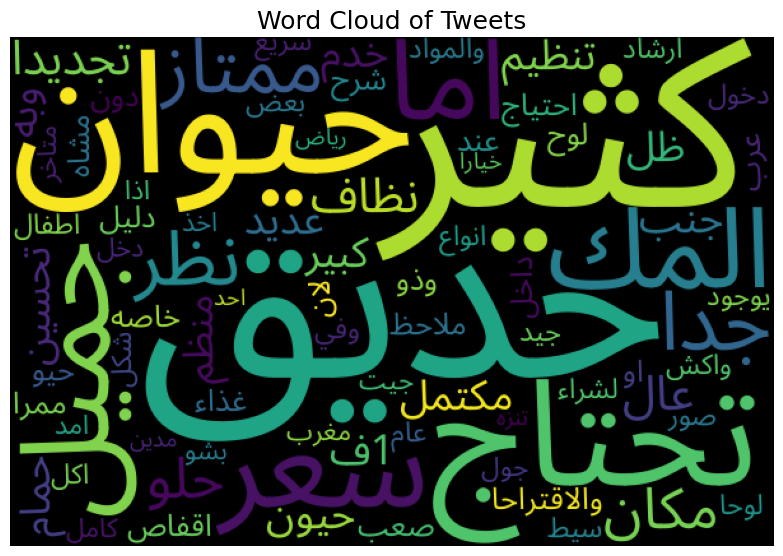

In [30]:
from wordcloud import WordCloud 
import arabic_reshaper 
from  bidi.algorithm import get_display


list_words = '' 
i = 0 

for tweet  in tweets['tweet_preprocessed']:
    for word in tweet: 
        i = i+1
        if( i > 100):
            break 
        list_words+=' '+(word)    

reshaped_text = arabic_reshaper.reshape(list_words)
artext = get_display(reshaped_text)

font_path_arabic = 'NotoSansArabic-VariableFont_wdth,wght.ttf' # Make sure this file exists in your directory

try:
    wordcloud = WordCloud(font_path=font_path_arabic,
                          width = 600, height = 400,
                          background_color = 'black',
                          min_font_size = 10).generate(artext)

    fig, ax = plt.subplots(figsize = (8, 6))

    ax.set_title('Word Cloud of Tweets', fontsize = 18)
    ax.grid(False)
    ax.imshow((wordcloud))
    fig.tight_layout(pad=0)
    ax.axis('off')
    plt.show()

except OSError as e:
    print(f"Error generating word cloud: {e}")
    print(f"Please check if the font file '{font_path_arabic}' exists and is accessible.")
    print("Also, ensure it's a font that supports Arabic characters.")


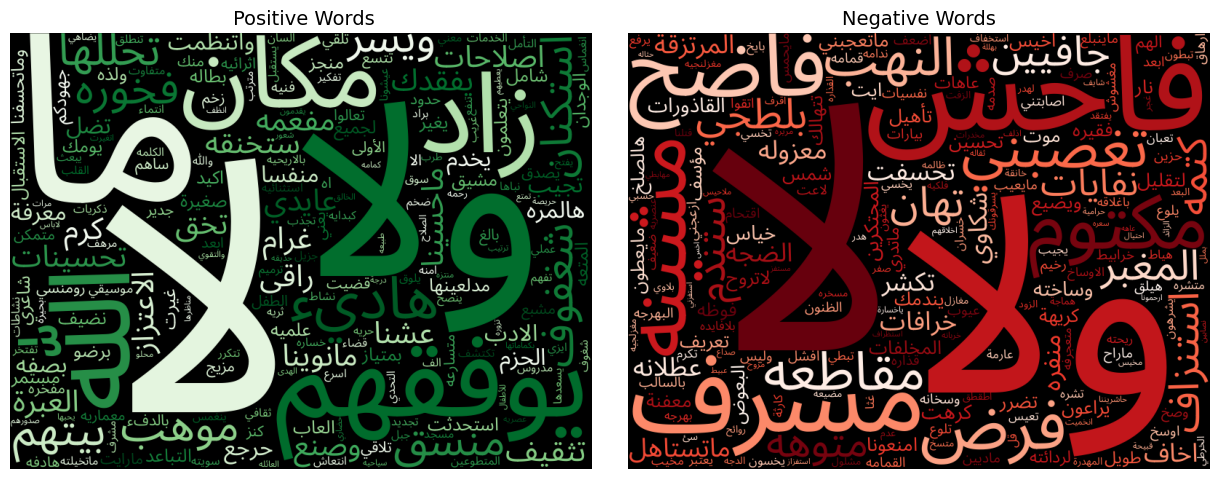

In [33]:
fig, ax = plt.subplots(1, 2,figsize = (12, 10))

positive_words=positive['word']

negative_words=negative['word']

list_words_positive=''

for word in positive_words.values:
    list_words_positive += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_words_positive)
artext = get_display(reshaped_text)

wordcloud_positive = WordCloud(font_path='NotoSansArabic-VariableFont_wdth,wght.ttf',
                               width = 800, height = 600, 
                               background_color = 'black', 
                               colormap = 'Greens',
                               min_font_size = 10).generate(artext)
ax[0].set_title(' Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for word in negative_words.values:
    list_words_negative += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_words_negative)
artext = get_display(reshaped_text)

wordcloud_negative = WordCloud(font_path='NotoSansArabic-VariableFont_wdth,wght.ttf',
                               width = 800, height = 600, 
                               background_color = 'black', colormap = 'Reds',
                               min_font_size = 10).generate(artext)
ax[1].set_title('Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [36]:
sentences = ['Artificial Intelligence Learning', 
                'Human Intelligence', 
                "Machine Learning", 
                "Deep Learning"]

from tensorflow.keras.preprocessing.text import Tokenizer 

tokenizer = Tokenizer(num_words=10) 

tokenizer.fit_on_texts(sentences)

sentences = tokenizer.texts_to_sequences(sentences)
print(sentences)


[[3, 2, 1], [4, 2], [5, 1], [6, 1]]


In [38]:
word_index = tokenizer.word_index
word_index

{'learning': 1,
 'intelligence': 2,
 'artificial': 3,
 'human': 4,
 'machine': 5,
 'deep': 6}

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pads = pad_sequences(sentences,maxlen=3)

pads


array([[3, 2, 1],
       [0, 4, 2],
       [0, 5, 1],
       [0, 6, 1]])

In [40]:
sentences = tweets['tweet_preprocessed'].apply(to_sentence)
sentences


0        احد خيارا تنزه مدين رياض حديق حيوان جيت متاخر ...
1        حديق جميل اطفال سعر دخول ممتاز واكش سيط لشراء ...
2        ممتاز جدا عند ملاحظ والاقتراحا 1ف كثير اما جنب...
3        حديق منظم وبه عديد كبير حيوان خدم مكتمل تنظيم ...
4        تجديدا حلو مكان جميل سعر مناسب نتمني يسمح دخول...
                               ...                        
23533                                                مكتوم
23534                                                 مشين
23537                                                 فاضح
23539                                                 مسرف
23544                                                 فاحش
Name: tweet_preprocessed, Length: 19845, dtype: object

In [42]:
max_sentencs_len = 0 

for sentence in sentences: 
    if( max_sentencs_len < len(sentence)):
        max_sentencs_len = len(sentence)
max_sentencs_len        


2641

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000 
max_sequence_len = 60 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sentences.values)
seqs = tokenizer.texts_to_sequences(sentences.values) 

X = pad_sequences(seqs)




In [47]:
print(sentences[25])
print(seqs[25])
print(X[25])

مكان جميل انصح زيار رسوم دخول
[3, 1, 16, 6, 80, 11]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [50]:
polarity_duct = { 'negative':0 , 'neutral':1,'positive':2}
# y = tweets['polarity'].apply(lambda x : polarity_duct[x] )
y = tweets['polarity'].map({ 'negative':0 , 'neutral':1,'positive':2, 0:0 , 1:1 ,2:2})
y

0        2
1        2
2        0
3        2
4        2
        ..
23533    0
23534    0
23537    0
23539    0
23544    0
Name: polarity, Length: 19845, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [54]:
import numpy as np
# or from imblearn.over_sampling import RandomOverSampler
posCount = np.count_nonzero(y_train==2)
neuCount = np.count_nonzero(y_train==1)
negCount = np.count_nonzero(y_train==0)
print(negCount,  neuCount, posCount)

total_3 = (posCount+ negCount+  neuCount) / 3

weight_for_0 = total_3 / negCount 
weight_for_1 = total_3 / neuCount 
weight_for_2 = total_3 / posCount 
print(weight_for_0, weight_for_1, weight_for_2)
      

class_weight = {0: weight_for_0, 1: weight_for_1, 2:weight_for_2}

1873 1015 11995
2.6486919380672718 4.8876847290640395 0.41358899541475613


In [57]:
from keras.models import Sequential

from keras.layers import Input, Embedding, Dense, LSTM

from keras.optimizers import Adam

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2
learning_rate = 0.001

model = Sequential()

model.add(Input(shape=(max_sequence_len ,)))

model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_sequence_len ))

model.add(LSTM(units = hidden_unit ,dropout=dropout_rate))

model.add(Dense(units = 3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
                optimizer = Adam(learning_rate = learning_rate), 
                metrics = ['accuracy'])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [58]:
epochs=10
batch_size=128

history = model.fit(X_train, y_train, class_weight=class_weight,
                             epochs=epochs, batch_size=batch_size,
                             validation_data=(X_test, y_test))

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.5302 - loss: 1.0280 - val_accuracy: 0.7878 - val_loss: 0.5947
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.8151 - loss: 0.7110 - val_accuracy: 0.8253 - val_loss: 0.4604
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.8675 - loss: 0.5285 - val_accuracy: 0.8692 - val_loss: 0.3337
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9099 - loss: 0.3958 - val_accuracy: 0.8565 - val_loss: 0.3394
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.9217 - loss: 0.3014 - val_accuracy: 0.8708 - val_loss: 0.3436
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.9369 - loss: 0.2369 - val_accuracy: 0.8823 - val_loss: 0.3344
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9501 - loss: 0.1887 - val_accuracy: 0.8761 - val_loss: 0.3698
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.9554 - loss: 0

In [59]:
model.evaluate(X_test,y_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9047 - loss: 0.3311


[0.36887866258621216, 0.8986296057701111]

In [68]:
def create_model(embed_dim = 32, 
                 hidden_unit = 16, 
                 dropout_rate = 0.2, 
                 learning_rate = 0.001):
    
    model = Sequential()
    
    model.add(Input(shape=(max_sequence_len ,)))
    
    model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_sequence_len ))
    
    model.add(LSTM(units = hidden_unit ,dropout=dropout_rate))
    
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', 
                    optimizer = Adam(learning_rate = learning_rate), 
                    metrics = ['accuracy'])
    return model

In [69]:
# pip install scikeras

In [70]:
from scikeras.wrappers import KerasClassifier

model_keras = KerasClassifier(model = create_model, epochs = 25, batch_size=128)

In [71]:
param_grid = {
    'model__embed_dim': [32, 64],
    'model__hidden_unit': [16, 32, 64 ],
    'model__dropout_rate': [0.2, 0.5],
    'model__learning_rate': [0.01, 0.001, 0.0001]
}

In [72]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = model_keras, param_grid = param_grid, cv = 5)
grid_result = grid.fit(X_train, y_train)

results_df = pd.DataFrame(grid_result.cv_results_)

results_df.to_csv('grid_search_results.csv', index=False)

print("Best parameters: ", grid_result.best_params_)

print("Best accuracy: ", grid_result.best_score_)

Epoch 1/25


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.8109 - loss: 0.5584
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9187 - loss: 0.2054
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9613 - loss: 0.1119
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9708 - loss: 0.0807
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9794 - loss: 0.0558
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9818 - loss: 0.0486
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9857 - loss: 0.0391
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9899 - loss: 0.0286
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9881 - loss: 0.0329
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9891 - loss: 0.0292
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9884 - loss: 0.0292
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.7992 - loss: 0.5714
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9213 - loss: 0.2065
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9528 - loss: 0.1320
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9709 - loss: 0.0821
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9777 - loss: 0.0632
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9806 - loss: 0.0578
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9847 - loss: 0.0446
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9864 - loss: 0.0381
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9870 - loss: 0.0350
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9890 - loss: 0.0329
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9905 - loss: 0.0263
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9905

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8087 - loss: 0.5529
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9131 - loss: 0.2199
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9485 - loss: 0.1487
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9671 - loss: 0.0932
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9779 - loss: 0.0645
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9846 - loss: 0.0460
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9837 - loss: 0.0458
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9848 - loss: 0.0439
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9876 - loss: 0.0343
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9892 - loss: 0.0321
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9885 - loss: 0.0307
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9894 - 

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


48/94 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7616 - loss: 0.6511


KeyboardInterrupt



In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping

# --- Reproducibility ---
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# --- Model Creation Function ---
def create_model(embed_dim=32,
                 hidden_unit=16,
                 dropout_rate=0.2,
                 learning_rate=0.001,
                 max_words=max_words,
                 max_sequence_len=max_sequence_len):

    model = Sequential()
    model.add(Input(shape=(max_sequence_len,)))
    model.add(Embedding(input_dim=max_words, output_dim=embed_dim, input_length=max_sequence_len))
    model.add(LSTM(units=hidden_unit, dropout=dropout_rate))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model


# --- EarlyStopping ---
early_stop = EarlyStopping(monitor='loss', patience=3)




# --- KerasClassifier Wrapper ---
model_keras = KerasClassifier(
    model=create_model,
    epochs=25,
    batch_size=128,
    callbacks=[early_stop],
    max_words=max_words,
    max_sequence_len=max_sequence_len,
    verbose=0
)

# --- Hyperparameter Grid ---
param_grid = {
    'model__embed_dim': [32, 64],
    'model__hidden_unit': [16, 32, 64],
    'model__dropout_rate': [0.2, 0.5],
    'model__learning_rate': [0.01, 0.001, 0.0001]
}

# --- Randomized Search ---
random_search = RandomizedSearchCV(
    estimator=model_keras,
    param_distributions=param_grid,
    n_iter=10,         # Try 10 random combinations
    cv=3,              # 3-fold cross-validation
    random_state=seed,
    verbose=2,
    n_jobs=-1
)

# --- Fit to Training Data ---
random_search_result = random_search.fit(X_train, y_train)

# --- Save Results ---
results_df = pd.DataFrame(random_search_result.cv_results_)
results_df.to_csv('random_search_results.csv', index=False)

# --- Best Results ---
print("✅ Best Parameters:", random_search_result.best_params_)
print("✅ Best Accuracy:", random_search_result.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Best Parameters: {'model__learning_rate': 0.0001, 'model__hidden_unit': 64, 'model__embed_dim': 64, 'model__dropout_rate': 0.2}
✅ Best Accuracy: 0.9044547470268092


In [76]:
model = create_model(embed_dim = 64, 
                        hidden_unit = 64, 
                        dropout_rate = 0.2, 
                        learning_rate = 0.001)


history = model.fit(X_train, y_train, class_weight=class_weight,
                             epochs=epochs, batch_size=batch_size,
                             validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


117/117 ━━━━━━━━━━━━━━━━━━━━ 63s 522ms/step - accuracy: 0.5573 - loss: 0.9885 - val_accuracy: 0.7797 - val_loss: 0.5486
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 62s 532ms/step - accuracy: 0.8474 - loss: 0.5747 - val_accuracy: 0.8327 - val_loss: 0.4114
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 83s 537ms/step - accuracy: 0.8983 - loss: 0.4033 - val_accuracy: 0.8003 - val_loss: 0.5265
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 63s 543ms/step - accuracy: 0.9138 - loss: 0.2963 - val_accuracy: 0.8783 - val_loss: 0.3202
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 541ms/step - accuracy: 0.9351 - loss: 0.2352 - val_accuracy: 0.8462 - val_loss: 0.3845
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 63s 539ms/step - accuracy: 0.9446 - loss: 0.1842 - val_accuracy: 0.8654 - val_loss: 0.3713
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 63s 537ms/step - accuracy: 0.9537 - loss: 0.1542 - val_accuracy: 0.8853 - val_loss: 0.3650
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 63s 536ms/step - accuracy: 0.9644 - loss: 0.1232 - val

In [77]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Train Accuracy: 0.9711079597473145
Validation Accuracy: 0.8730350732803345


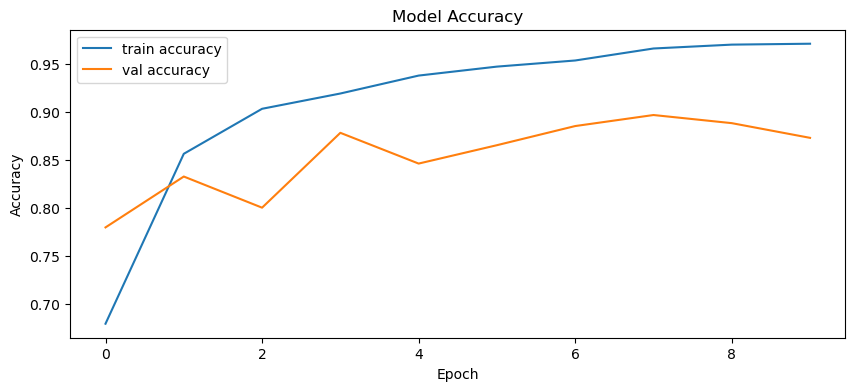

In [78]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [79]:
model.save('sa_model.keras')

In [80]:
import pickle

tokenizer_path = 'sa_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [85]:
from keras.models import load_model
import pickle

def classify_tweets(tweets, model_path, tokenizer_path, sequence_max_len):
    processed_tweets = []
    for x in tweets:
        
        y = text_processing(x)

        y = to_sentence(y)
        
        processed_tweets.append(y)

    model = load_model(model_path)
    
    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)

    text_2_seq = tokenizer.texts_to_sequences(processed_tweets)

    text_pad = pad_sequences(text_2_seq, maxlen=sequence_max_len)

    predictions=model.predict(text_pad)

    sentiments = []
    for pred in predictions:
        max = np.argmax(pred, axis=0)
        if max == 0:
            sentiments.append("Negative")
        elif max == 1:
            sentiments.append("Neutral")
        else:
            sentiments.append("Positive")
    return sentiments

In [86]:
new_tweets=["مكان وسخ",
        "مكان رائع وجميل",
        "من أجمل الأماكن التي زرتها بحياتي",
        "يمكن التسوق فيها"]

predictions = classify_tweets(new_tweets,'sa_model.keras','sa_tokenizer',60)

for sentence, prediction in zip(new_tweets, predictions):
    print(f"Sentence: {sentence} - Sentiment: {prediction}  ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Sentence: مكان وسخ - Sentiment: Negative  
Sentence: مكان رائع وجميل - Sentiment: Positive  
Sentence: من أجمل الأماكن التي زرتها بحياتي - Sentiment: Positive  
Sentence: يمكن التسوق فيها - Sentiment: Neutral  
